<a href="https://colab.research.google.com/github/AdrijaVishwakarma/Image-Classification-with-CNNs/blob/main/Image_Classification_with_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow (if not already installed)
!pip install tensorflow

In [2]:
# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# 2. Load Dataset (MNIST)
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# 3. Preprocess Data
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255

In [5]:
# 4. Define CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 5. Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# 6. Train Model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.9056 - loss: 0.3155 - val_accuracy: 0.9857 - val_loss: 0.0437
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9840 - loss: 0.0501 - val_accuracy: 0.9882 - val_loss: 0.0382
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9904 - loss: 0.0309 - val_accuracy: 0.9893 - val_loss: 0.0346
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9932 - loss: 0.0229 - val_accuracy: 0.9853 - val_loss: 0.0505
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9945 - loss: 0.0170 - val_accuracy: 0.9903 - val_loss: 0.0291


In [8]:
# 7. Evaluate Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc*100:.2f}%")

313/313 - 2s - 7ms/step - accuracy: 0.9903 - loss: 0.0291

Test accuracy: 99.03%


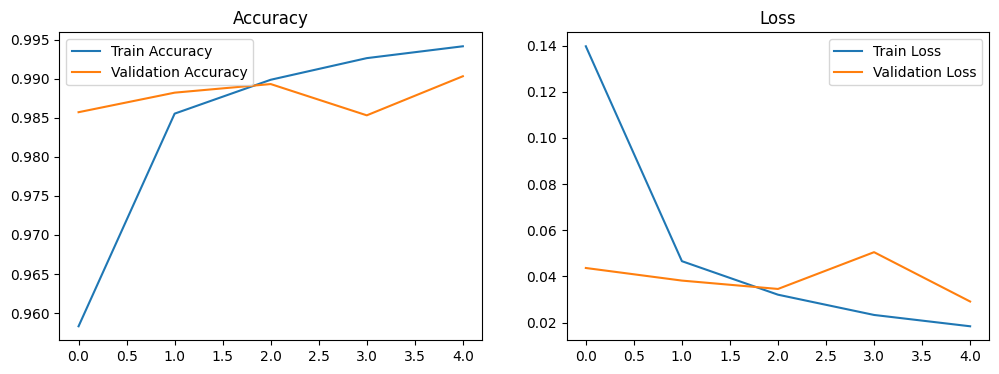

In [9]:
# 8. Plot Accuracy and Loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [10]:
# 9. Save Model
model.save("mnist_cnn_model.h5")